znacka,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
W,11.57307,11.77871,3.58051446,21.20936,3.834908,0.3056378,0.3939457
X,13.45655,13.60827,4.53496803,23.78795,4.389243,0.1919613,0.5806685
Y,10.98947,10.97701,0.64572209,21.19074,3.818380,0.5696301,0.9583609
Z,12.11484,12.33560,0.03773015,25.87760,5.370670,0.4991860,0.5180354



	Bartlett test of homogeneity of variances

data:  zlepseni by znacka
Bartlett's K-squared = 23.458, df = 3, p-value = 3.241e-05



	Kruskal-Wallis rank sum test

data:  zlepseni by znacka
Kruskal-Wallis chi-squared = 25.075, df = 3, p-value = 1.489e-05


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 25.0753, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          W          X          Y
---------+---------------------------------
       X |  -3.565342
         |    0.0022*
         |
       Y |   1.263065   4.818329
         |     1.0000    0.0000*
         |
       Z |  -0.926954   2.618483  -2.180454
         |     1.0000     0.0530     0.1753

alpha = 0.05
Reject Ho if p <= alpha


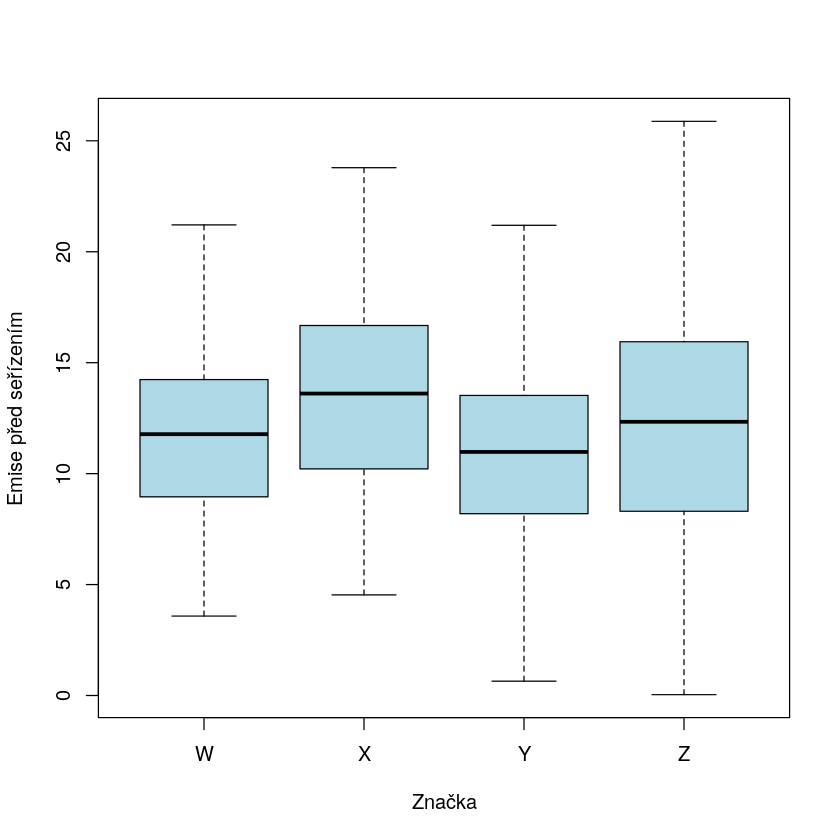

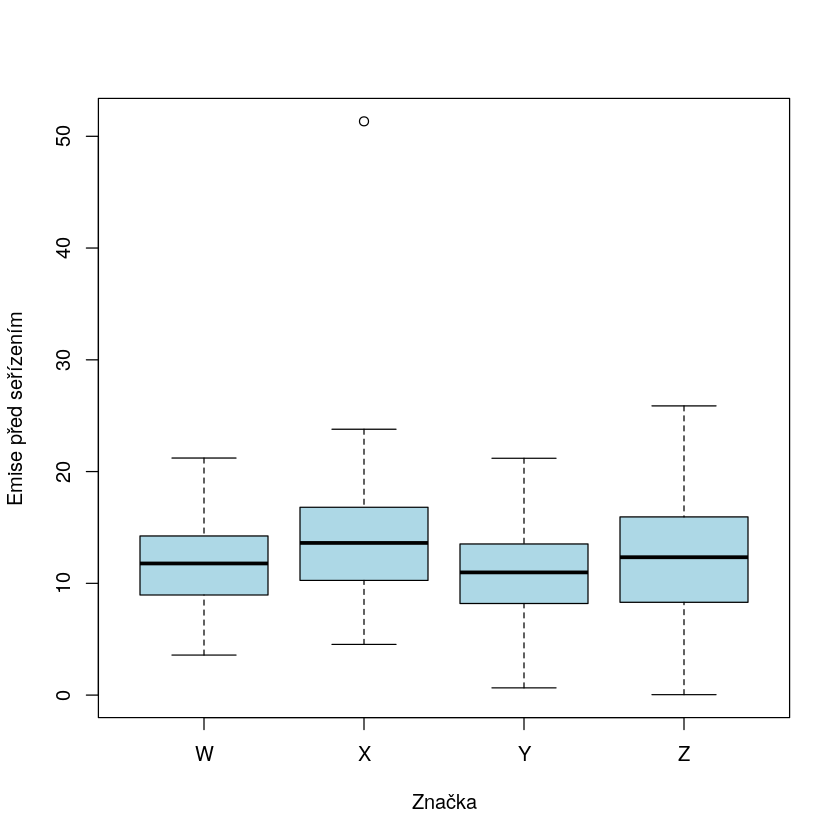

In [33]:
library(dplyr)
# Nastavení náhodného semene pro reprodukovatelnost
set.seed(3)

# Počet motorů pro každou značku
n <- 150

# Generování dat
id <- 1:(4 * n)
znacka <- rep(c("X", "Y", "Z", "W"), each = n)
emise_pred <- round(rnorm(4 * n, mean = 150, sd = 20), 2) # emise před seřízením
emise_po <- round(emise_pred - rnorm(4 * n, mean = 20, sd = 5), 2) # emise po seřízení
emise_po[znacka == "X"] <- emise_po[znacka == "X"] - 2 # zvýšení emisí pro značku X
emise_po[znacka == "Y"] <- emise_po[znacka == "Y"] + 2 # snížení emisí pro značku Y
emise_po[znacka == "Z"] <- (emise_po[znacka == "Z"] - 130)*1.15 + 130 # zvýšení emisí pro značku Z
problem <- sample(c(TRUE, FALSE), 4 * n, replace = TRUE, prob = c(0.3, 0.7)) # 10% problémy
emise_po[problem] <- emise_po[problem] + 5 # zvýšení emisí pro problémové motory

# Vytvoření data frame
data <- data.frame(
    id = id,
    znacka = znacka,
    emise_pred = emise_pred,
    emise_po = emise_po,
    problem = problem
)

# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$emise_pred - data$emise_po) / data$emise_pred * 100

for (i in 1:4) {
    outliers <- data %>%
        group_by(znacka) %>%
        rstatix::identify_outliers(zlepseni)

    data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
    data <- na.omit(data)
}

boxplot(data$zlepseni ~ data$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

summry <- data %>%
    group_by(znacka) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry
bartlett.test(zlepseni ~ znacka, data = data)
kruskal.test(zlepseni ~ znacka, data = data)
dunn.test::dunn.test(data$zlepseni, data$znacka, method = "bonferroni", altp = TRUE)

data$emise_po[16] <- 70
data$zlepseni <- (data1$emise_pred - data1$emise_po) / data1$emise_pred * 100
data1 <- data
boxplot(data1$zlepseni ~ data1$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")


In [32]:
outliers <- data %>%
    group_by(znacka) %>%
    rstatix::identify_outliers(zlepseni)

data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
data <- na.omit(data)
summry <- data %>%
    group_by(znacka) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry

autox <- data %>%
    filter(znacka == "X") %>%
    select(zlepseni)
t.test(autox, mu = 0)

table(autox>10)


znacka,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
W,11.57307,11.77871,3.58051446,21.20936,3.834908,0.3056378,0.3939457
X,13.48434,13.61135,4.53496803,23.78795,4.390971,0.1865336,0.6444468
Y,10.98947,10.97701,0.64572209,21.19074,3.818380,0.5696301,0.9583609
Z,12.11484,12.33560,0.03773015,25.87760,5.370670,0.4991860,0.5180354



	One Sample t-test

data:  autox
t = 37.359, df = 147, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 12.77105 14.19763
sample estimates:
mean of x 
 13.48434 



FALSE  TRUE 
   35   113 

,id,znacka,emise_pred,emise_po,problem
,<int>,<chr>,<dbl>,<dbl>,<lgl>
1,1,X,130.76,110.85,FALSE
2,2,X,144.15,126.33,TRUE
3,3,X,155.18,146.03,TRUE
4,4,X,126.96,97.63,FALSE
5,5,X,153.92,139.40,FALSE
6,6,X,150.60,134.35,FALSE


Warning message:
“Please use 'rowNames' instead of 'row.names'”


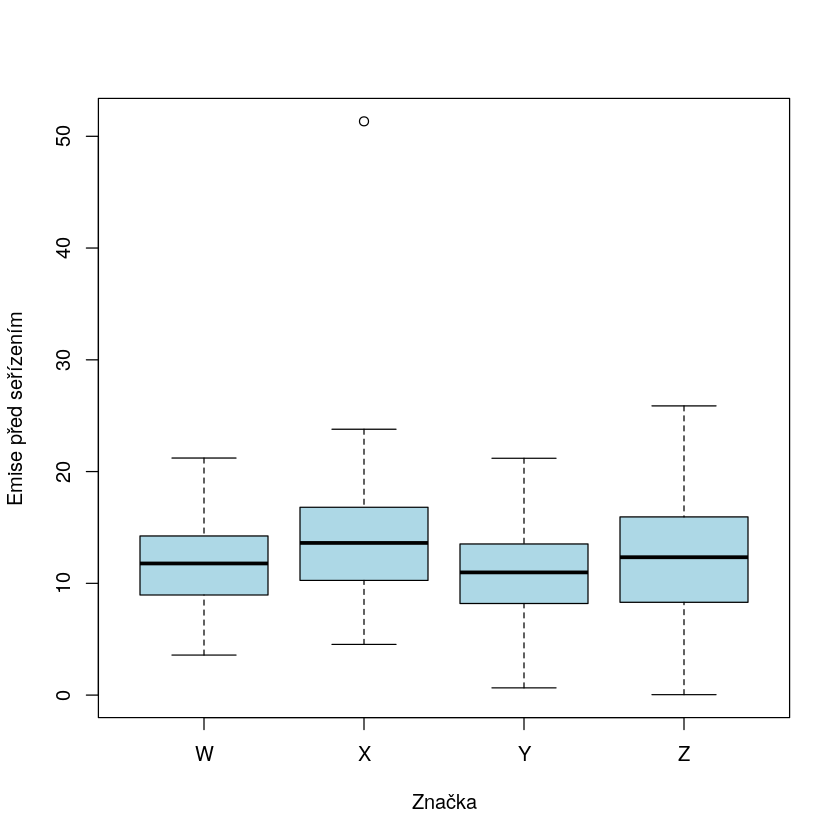

In [37]:
data1 <- data1 %>% select(id,znacka,emise_pred,emise_po,problem)
head(data1)
zlepseni <- (data1$emise_pred - data1$emise_po) / data1$emise_pred * 100
boxplot(zlepseni ~ data1$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")
library(openxlsx)

write.xlsx(data1, file = "zk2A.xlsx", row.names = FALSE)

-----


znacka,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
W,1.907192,1.52000,-9.950,13.970,4.913222,0.5069613,0.21294263
X,3.754631,3.84000,-9.780,17.250,5.420254,0.8369857,0.80001280
Y,-1.094333,-0.19500,-16.120,13.630,5.782367,0.6561740,0.01367229
Z,-1.177510,-0.95375,-16.772,13.473,6.354720,0.4244728,0.56298350



	Bartlett test of homogeneity of variances

data:  zlepseni by znacka
Bartlett's K-squared = 10.258, df = 3, p-value = 0.01649



	Kruskal-Wallis rank sum test

data:  zlepseni by znacka
Kruskal-Wallis chi-squared = 68.979, df = 3, p-value = 7.06e-15


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 68.9792, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          W          X          Y
---------+---------------------------------
       X |  -2.676739
         |    0.0446*
         |
       Y |   4.148589   6.864867
         |    0.0002*    0.0000*
         |
       Z |   4.232483   6.949192   0.084466
         |    0.0001*    0.0000*     1.0000

alpha = 0.05
Reject Ho if p <= alpha


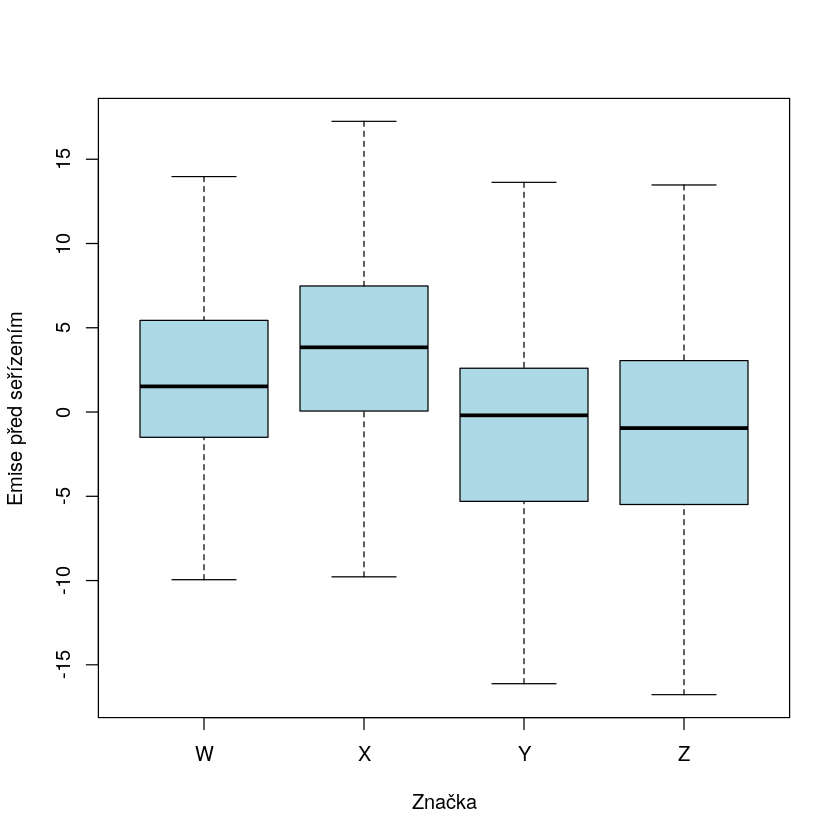

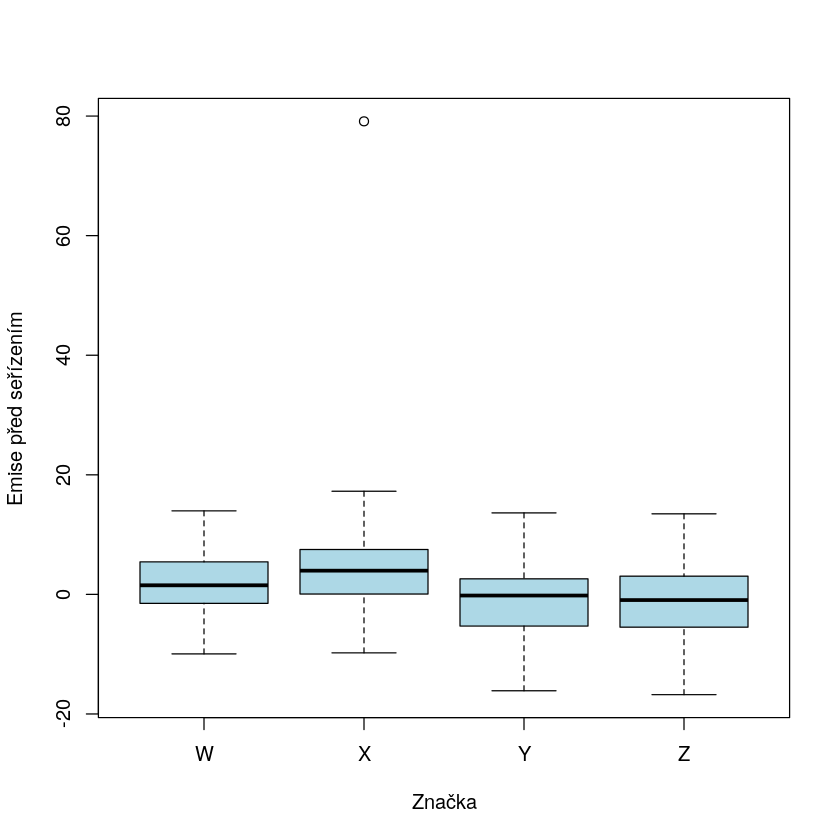

In [61]:
# Nastavení náhodného semene pro reprodukovatelnost
set.seed(4)

# Počet motorů pro každou značku
n <- 150

# Generování dat
id <- 1:(4 * n)
znacka <- rep(c("X", "Y", "Z", "W"), each = n)
emise_pred <- round(rnorm(4 * n, mean = 150, sd = 20), 2) # emise před seřízením
emise_po <- round(emise_pred - rnorm(4 * n, mean = 3, sd = 5), 2) # emise po seřízení
emise_po[znacka == "X"] <- emise_po[znacka == "X"] - 2 # zvýšení emisí pro značku X
emise_po[znacka == "Y"] <- emise_po[znacka == "Y"] + 2 # snížení emisí pro značku Y
emise_po[znacka == "Z"] <- (emise_po[znacka == "Z"] - 130) * 1.15 + 130 # zvýšení emisí pro značku Z
problem <- sample(c(TRUE, FALSE), 4 * n, replace = TRUE, prob = c(0.3, 0.7)) # 10% problémy
emise_po[problem] <- emise_po[problem] + 5 # zvýšení emisí pro problémové motory

# Vytvoření data frame
data <- data.frame(
    id = id,
    znacka = znacka,
    emise_pred = emise_pred,
    emise_po = emise_po,
    problem = problem
)

# Zobrazení prvních několika řádků data frame
data$zlepseni <- data$emise_pred - data$emise_po

for (i in 1:4) {
    outliers <- data %>%
        group_by(znacka) %>%
        rstatix::identify_outliers(zlepseni)

    data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
    data <- na.omit(data)
}

boxplot(data$zlepseni ~ data$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

summry <- data %>%
    group_by(znacka) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry
bartlett.test(zlepseni ~ znacka, data = data)
kruskal.test(zlepseni ~ znacka, data = data)
dunn.test::dunn.test(data$zlepseni, data$znacka, method = "bonferroni", altp = TRUE)

data$emise_po[18] <- 70
data$zlepseni <- data$emise_pred - data$emise_po
data1 <- data
boxplot(data1$zlepseni ~ data1$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")


znacka,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
W,1.907192,1.52000,-9.950,13.970,4.913222,0.5069613,0.21294263
X,3.755743,3.90500,-9.780,17.250,5.438642,0.8245141,0.66092723
Y,-1.094333,-0.19500,-16.120,13.630,5.782367,0.6561740,0.01367229
Z,-1.177510,-0.95375,-16.772,13.473,6.354720,0.4244728,0.56298350



	F test to compare two variances

data:  autox$zlepseni and autoy$zlepseni
F = 0.88465, num df = 147, denom df = 149, p-value = 0.4571
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6402758 1.2227224
sample estimates:
ratio of variances 
         0.8846464 



	One Sample t-test

data:  autox
t = 8.4011, df = 147, p-value = 1.73e-14
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 3.015742      Inf
sample estimates:
mean of x 
 3.755743 



	Two Sample t-test

data:  autox$zlepseni and autoy$zlepseni
t = 7.4563, df = 296, p-value = 9.901e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.569945 6.130208
sample estimates:
mean of x mean of y 
 3.755743 -1.094333 


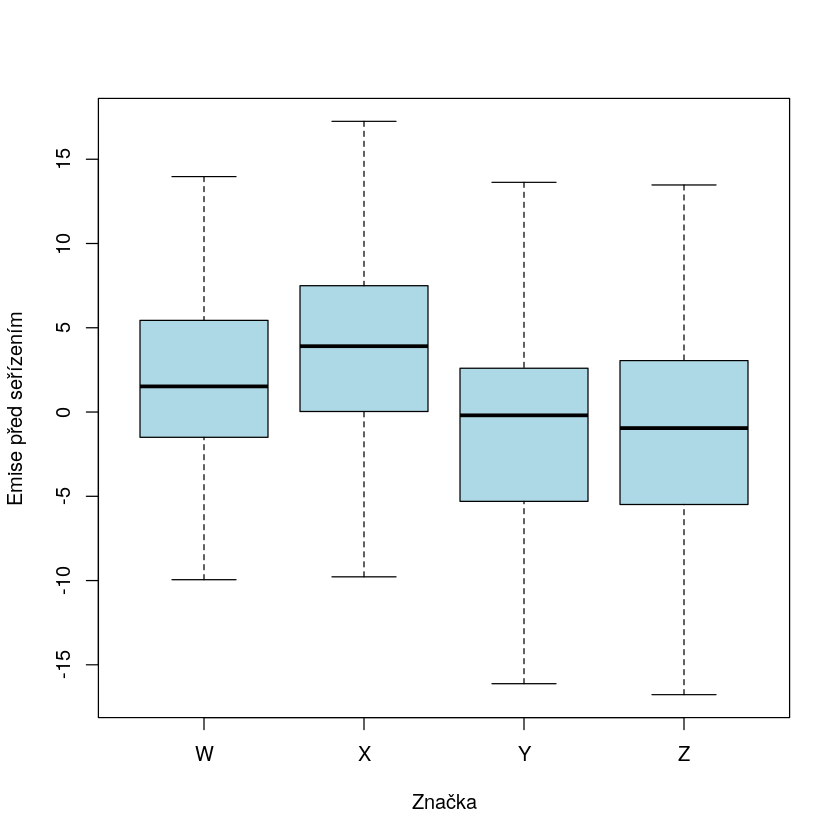

In [55]:
outliers <- data %>%
    group_by(znacka) %>%
    rstatix::identify_outliers(zlepseni)

data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
data <- na.omit(data)

boxplot(data$zlepseni ~ data$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")
summry <- data %>%
    group_by(znacka) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry
autox <- data %>%
    filter(znacka == "X") %>%
    select(zlepseni)
autoy <- data %>%
    filter(znacka == "Y") %>%
    select(zlepseni)

var.test(autox$zlepseni, autoy$zlepseni)
t.test(autox, mu = 0, alternative = "greater")
t.test(x = autox$zlepseni, y = autoy$zlepseni, alternative = "two.sided", confint = 0.95, var.equal = TRUE)


In [59]:
autox_fail <- autox$zlepseni < 0
problem <- data %>%
    filter(znacka == "X") %>%
    select(problem)
table(autox_fail, problem$problem)
table(problem$problem)

epiR::epi.2by2(table(autox_fail, problem$problem))

          
autox_fail FALSE TRUE
     FALSE    92   20
     TRUE     13   23


FALSE  TRUE 
  105    43 

             Outcome +    Outcome -      Total                 Inc risk *
Exposed +           92           20        112     82.14 (73.78 to 88.74)
Exposed -           13           23         36     36.11 (20.82 to 53.78)
Total              105           43        148     70.95 (62.92 to 78.11)

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 2.27 (1.46, 3.54)
Inc odds ratio                                 8.14 (3.53, 18.75)
Attrib risk in the exposed *                   46.03 (28.81, 63.25)
Attrib fraction in the exposed (%)            56.04 (31.54, 71.77)
Attrib risk in the population *                34.83 (17.52, 52.15)
Attrib fraction in the population (%)         49.10 (24.77, 65.56)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 28.005 Pr>chi2 = <0.001
Fisher exact test that OR = 1: Pr>chi2 = <0.001
 Wald confidence lim

,id,znacka,emise_pred,emise_po,problem
,<int>,<chr>,<dbl>,<dbl>,<lgl>
1,1,X,154.34,160.11,FALSE
2,2,X,139.15,137.01,FALSE
3,3,X,167.82,159.11,FALSE
4,4,X,161.92,158.08,FALSE
5,5,X,182.71,189.44,TRUE
6,6,X,163.79,167.80,TRUE


Warning message:
“Please use 'rowNames' instead of 'row.names'”


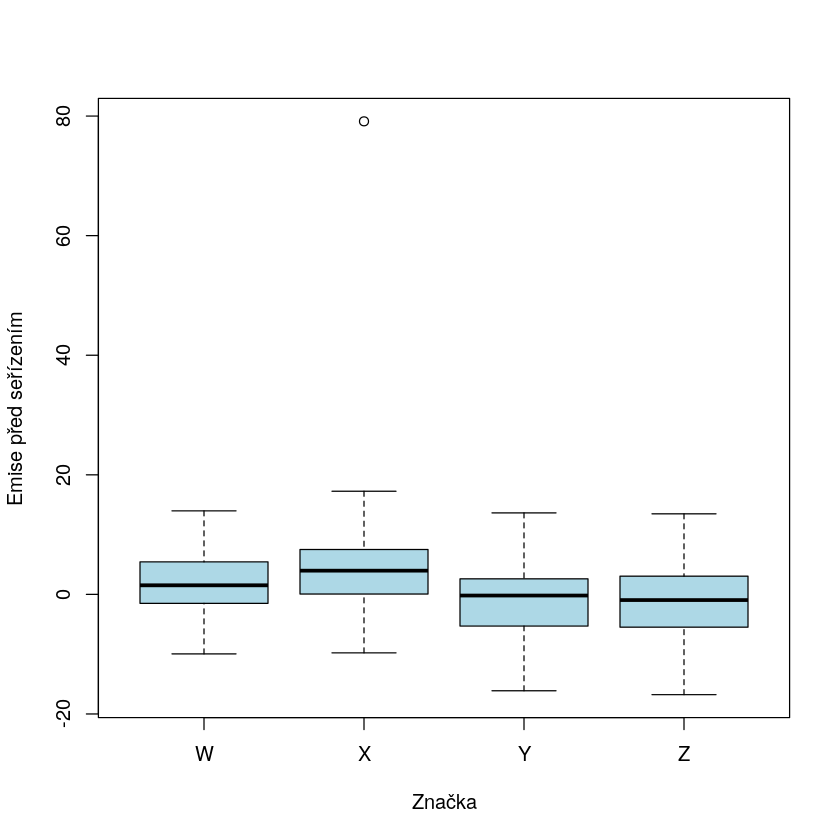

In [62]:
data1 <- data1 %>% select(id, znacka, emise_pred, emise_po, problem)
head(data1)
zlepseni <- (data1$emise_pred - data1$emise_po)
boxplot(zlepseni ~ data1$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")
library(openxlsx)

write.xlsx(data1, file = "zk2B.xlsx", row.names = FALSE)